In [1]:
# Enzyme analysis

In [1]:
# add data
inhibited <- data.frame(
  Substrate = c(1.0, 2.0, 3.0, 4.0, 5.0),
  Inhibitor = c(1.0, 1.0, 1.0, 1.0, 1.0),
  Rate = c(0.05, 0.10, 0.15, 0.16, 0.18)

)

uninhibited <- data.frame(
  Substrate = c(1.0, 2.0, 3.0, 4.0, 5.0),
  Inhibitor = c( 0.0, 0.0, 0.0, 0.0, 0.0),
  Rate = c(0.67, 1.13, 1.48, 1.74, 1.98)
  )

data <- rbind(inhibited, uninhibited)

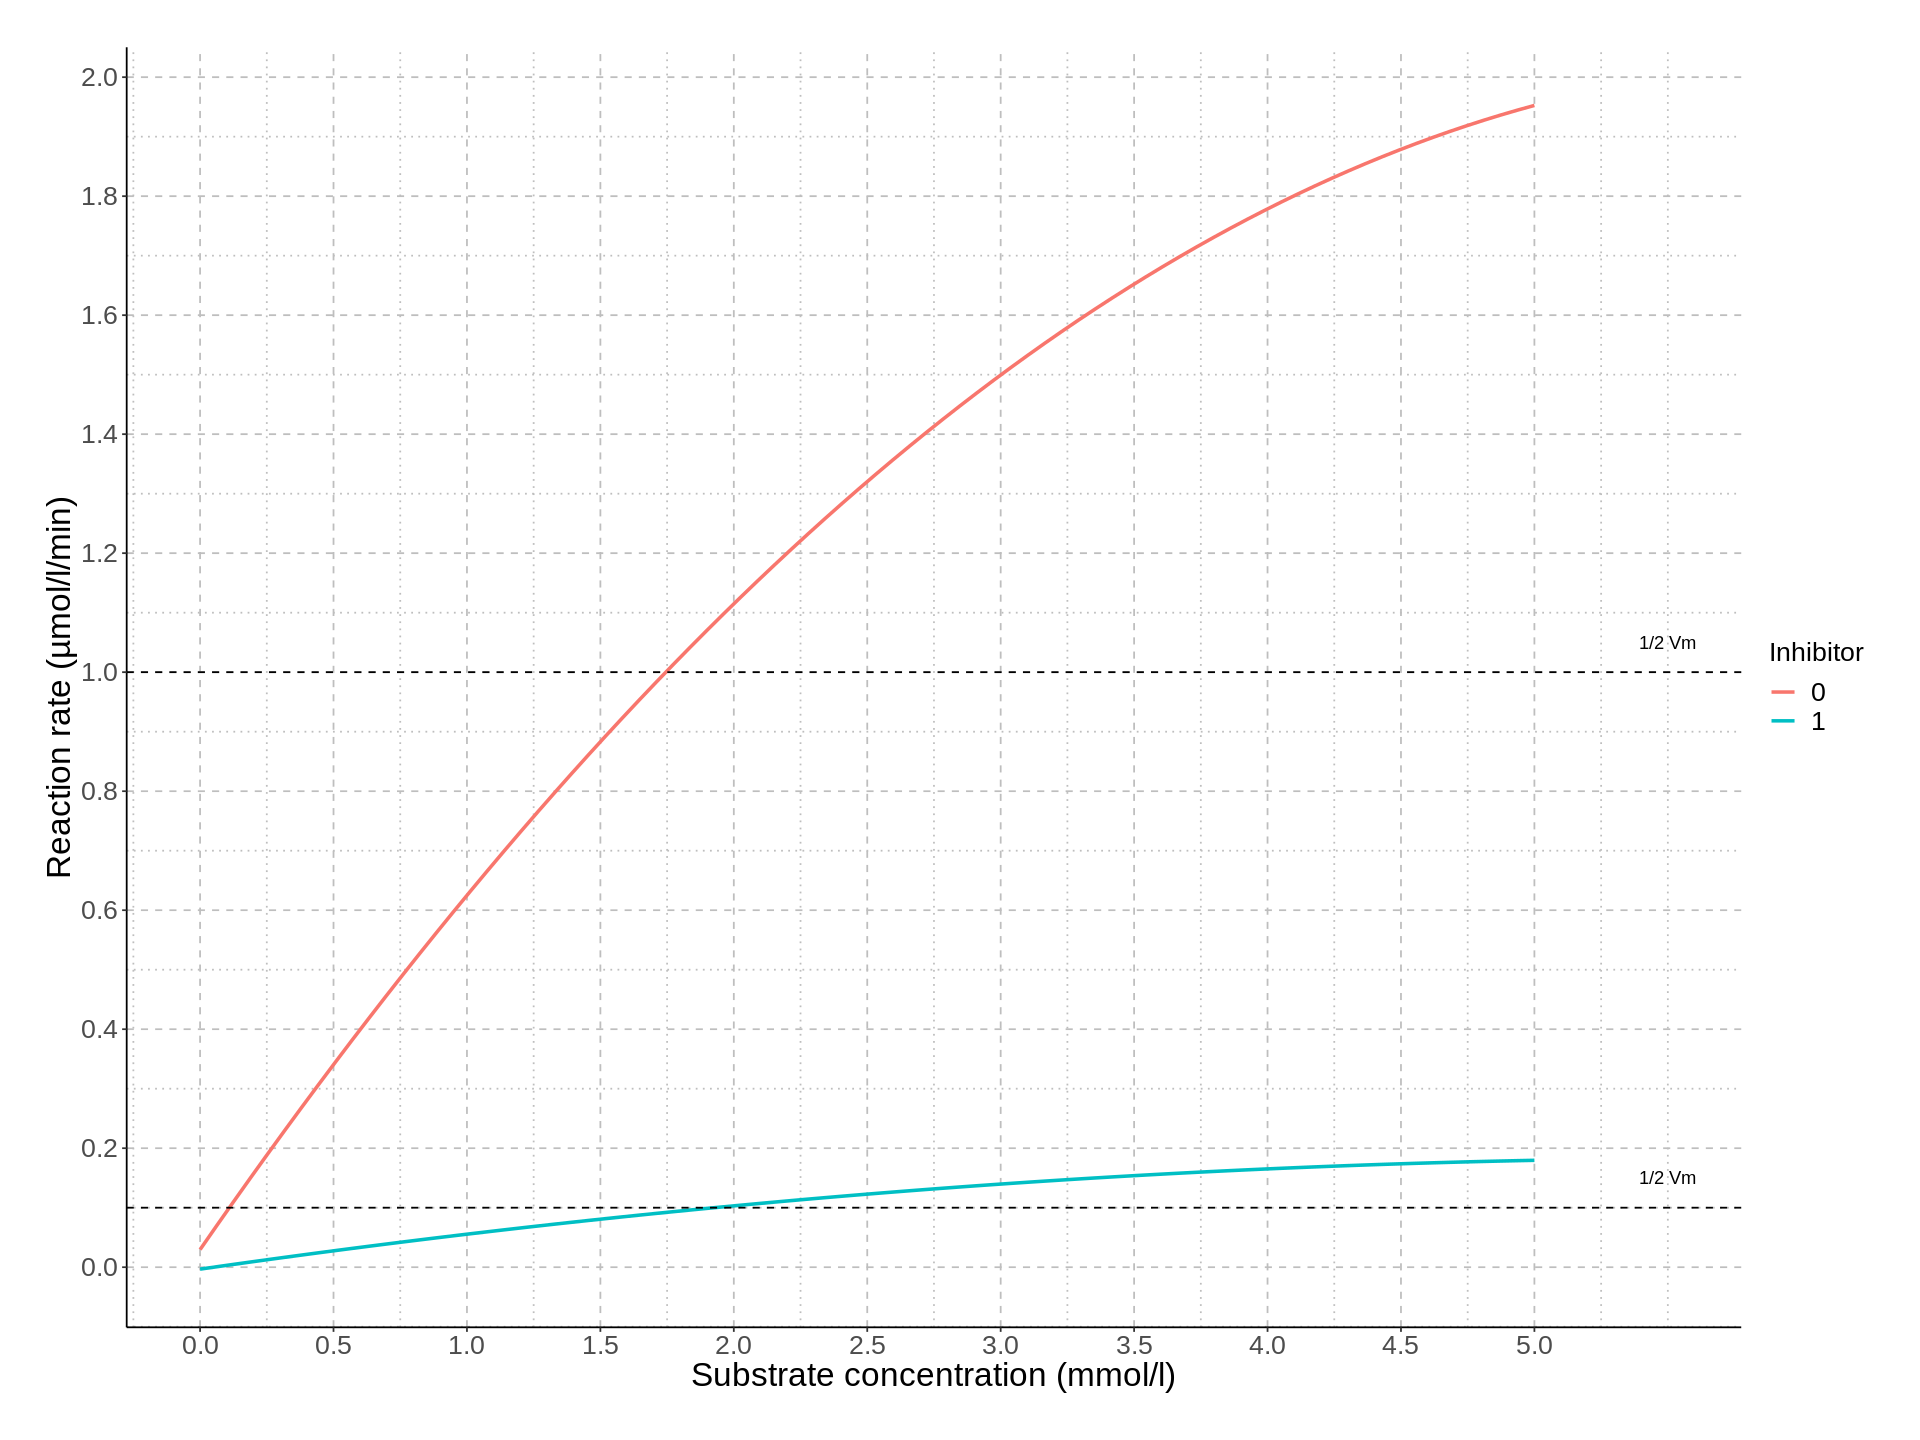

In [2]:

# Visualize the data
library(ggplot2)
options(repr.plot.width=16, repr.plot.height=12)

# add starting position zero to inhibited data and fitted values
inhibited_0 <- rbind(data.frame(Substrate = 0, Inhibitor = 1, Rate = 0), inhibited)
uninhibited_0 <- rbind(data.frame(Substrate = 0, Inhibitor = 0, Rate = 0), uninhibited)

# Combine the data frames
all_data <- rbind(uninhibited_0, inhibited_0)

# Create substrate concentration range
Substrate <- seq(0, 5, length.out = 100)

Vm_guess_inhibited <- 0.2
Vm_guess_uninhibited <- 2

# Plot the data and the fits
ggplot(all_data, aes(x = Substrate, y = Rate, color = factor(Inhibitor))) +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ poly(x, 2)) +
  scale_color_discrete(name = "Inhibitor") +
  labs(x = "Substrate concentration (mmol/l)", y = "Reaction rate (µmol/l/min)") +
  theme_classic() +
          # create line 1/2 Vm for two lines
            geom_hline(yintercept = Vm_guess_inhibited/2, linetype = "dashed", color = "black") +
            geom_hline(yintercept = Vm_guess_uninhibited/2, linetype = "dashed", color = "black") +
            # add 1/2 Vm labels at the right side of the plot and higheer than the lines
            annotate("text", x = 5.5, y = Vm_guess_inhibited/2 + 0.05, label = "1/2 Vm", color = "black") +
            annotate("text", x = 5.5, y = Vm_guess_uninhibited/2 + 0.05, label = "1/2 Vm", color = "black") +
            # axis ticks set to 0.5
            scale_y_continuous(breaks = seq(0, 2, 0.2)) +
            scale_x_continuous(breaks = seq(0, 5, 0.5)) +

  theme(panel.grid.major = element_line(color = "gray", linetype = "dashed"),
        panel.grid.minor = element_line(color = "gray", linetype = "dotted"),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16)) +    
  theme(plot.margin = unit(c(1,1,1,1), "cm"))




In [ ]:
# save the plot
ggsave("data_plot1.png", width = 16, height = 12, units = "in", dpi = 300)

In [3]:
# create a new data frame with reciprocal of substrate concentration and rate
inhibited_reciprocal <- data.frame(
  Substrate = 1/inhibited$Substrate,
  Inhibitor = inhibited$Inhibitor,
  Rate = 1/inhibited$Rate
)

uninhibited_reciprocal <- data.frame(
  Substrate = 1/uninhibited$Substrate,
  Inhibitor = uninhibited$Inhibitor,
  Rate = 1/uninhibited$Rate
)

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


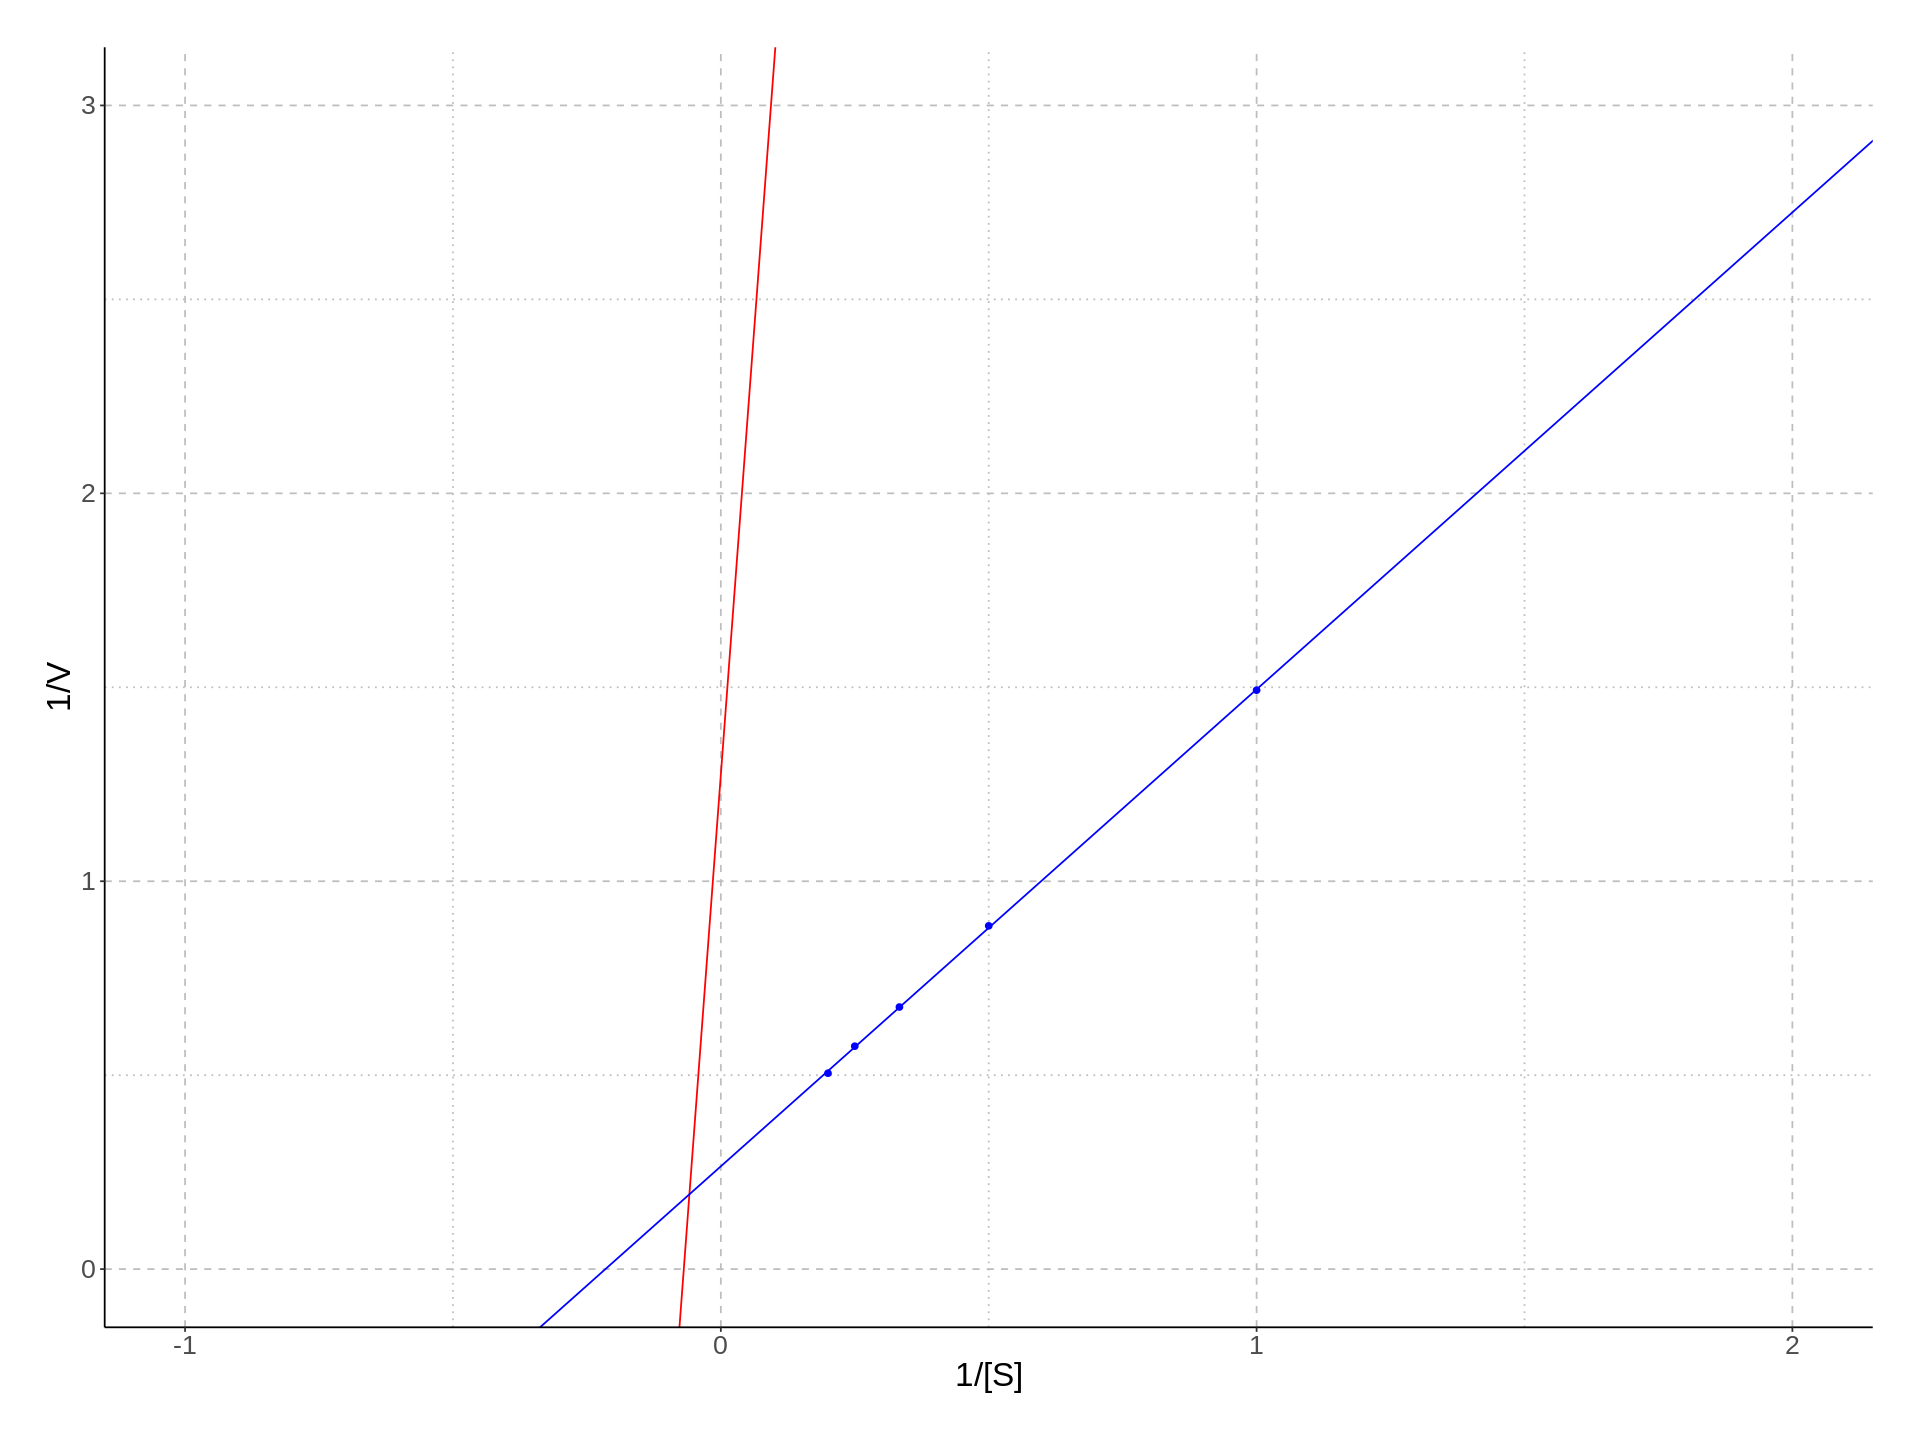

In [4]:
# Create Lineweaver-Burk plot two plots into one
fit <- lm(Rate ~ Substrate, data = inhibited_reciprocal)
slope <- summary(fit)$coefficients[2]
intercept <- summary(fit)$coefficients[1]

fit2 <- lm(Rate ~ Substrate, data = uninhibited_reciprocal)
slope2 <- summary(fit2)$coefficients[2]
intercept2 <- summary(fit2)$coefficients[1]


# plot the data into one plot using ggplot
ggplot() +
  geom_point(data = inhibited_reciprocal, aes(x = Substrate, y = Rate), color = "red") +
  geom_point(data = uninhibited_reciprocal, aes(x = Substrate, y = Rate), color = "blue") +
  geom_abline(intercept = intercept, slope = slope, color = "red") +
  geom_abline(intercept = intercept2, slope = slope2, color = "blue") +
  labs(x = "1/[S]", y = "1/V") +
  theme_classic() +
  # want x axis to start at -5
  scale_x_continuous(limits = c(-1, 2)) +
  scale_y_continuous(limits = c(0, 3)) +

  theme(panel.grid.major = element_line(color = "gray", linetype = "dashed"),
        panel.grid.minor = element_line(color = "gray", linetype = "dotted"),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16)) +    
  theme(plot.margin = unit(c(1,1,1,1), "cm"))